In [2]:
import os
import git
repo = git.Repo('.', search_parent_directories=True)

import numpy as np
import matplotlib
from matplotlib import pyplot as plt

Tab10Colors = matplotlib.color_sequences['tab10']

In [3]:
# Setup
NSteps = "1E7"
N = 100

SchemeVariances = {}
FocusSimBeta = 10.0
FocusQData = {} # Metropolis-random, Heatbath-random, Metropolis-sequential, Heatbath-sequential

# Import data
for r,rs in enumerate(["random", "sequential"]):
    dirpath = repo.working_tree_dir + "/convergence/data/" + rs
    for s,scheme in enumerate(["Metropolis", "Heatbath"]):
        filepath = dirpath + f"/N={N}/{scheme}_NSteps={NSteps}.txt"
        Data = np.loadtxt(filepath, unpack=True, delimiter=';')
        SimBetas = Data[:,0]
        QData = Data[:,1:]

        Variances = np.zeros([len(SimBetas),2])
        Variances[:,0] = SimBetas
        Variances[:,1] = np.std(QData,axis=1)
        SchemeVariances[scheme + "-" + rs] = Variances

        Index = list(SimBetas).index(FocusSimBeta)
        FocusQData[scheme + "-" + rs] = QData[Index]

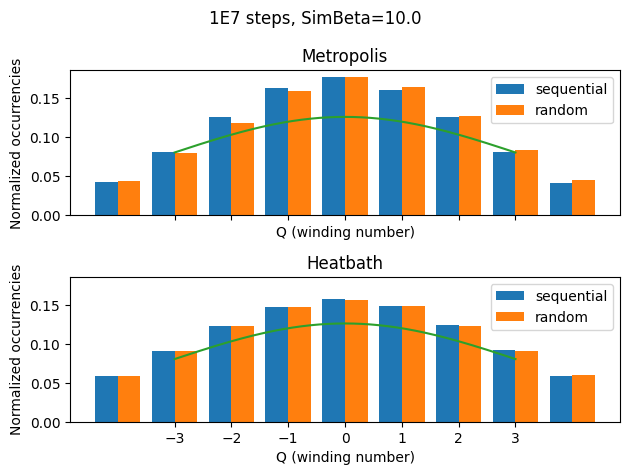

In [4]:
histograms, axs = plt.subplots(2,sharex=True,sharey=True)
for s,scheme in enumerate(["Metropolis", "Heatbath"]):
    # Plot selected histogram
    ax = axs[s]

    bins_array = [x+0.5 for x in range(-5,5)]
    histogram = ax.hist([FocusQData[scheme + "-sequential"], FocusQData[scheme + "-random"]], 
                        bins=bins_array, density=True,label=["sequential", "random"])
    ax.set_xlabel("Q (winding number)")
    ax.set_ylabel("Normalized occurrencies")
    ax.set_xticks([x for x in range(-3,4)])
    ax.legend(loc="upper right")

    xx = np.linspace(-3,3,1000)
    ax.plot(xx,np.e**(-xx**2/(2*FocusSimBeta))/np.sqrt(2*np.pi*FocusSimBeta))

axs[0].set_title("Metropolis")
axs[1].set_title("Heatbath")
plt.suptitle(f"{NSteps} steps, SimBeta={FocusSimBeta}")
plt.tight_layout()
plt.show(histograms)

In [5]:
def GetQCorrelator(l,QSamples):
    N = len(QSamples)
    QCorrelator = 0
    for j in range(N-l):
        QCorrelator += QSamples[j]*QSamples[j+l]
    QCorrelator /= N-l
    return QCorrelator

def GetBlockLengths(QSamples):
    N = len(QSamples)
    BlockLengths = []
    iStart = 0
    while iStart<N-1:
        i = iStart+1
        while (QSamples[i]==QSamples[iStart] and i<N):
            i += 1
        l = i-iStart
        iStart = i+1
        BlockLengths.append(l)
    return BlockLengths

maxl = 1000
QC = {}
BL = {}

# Import data
for r,rs in enumerate(["random", "sequential"]):
    for s,scheme in enumerate(["Metropolis", "Heatbath"]):
        QSamples = FocusQData[scheme + "-" + rs]
        TmpArray = []
        for l in range(maxl): # spaghetti goes brr
            TmpArray.append(GetQCorrelator(l,QSamples))
        QC[scheme + "-" + rs] = TmpArray
        BL[scheme + "-" + rs] = GetBlockLengths(QSamples)

KeyboardInterrupt: 

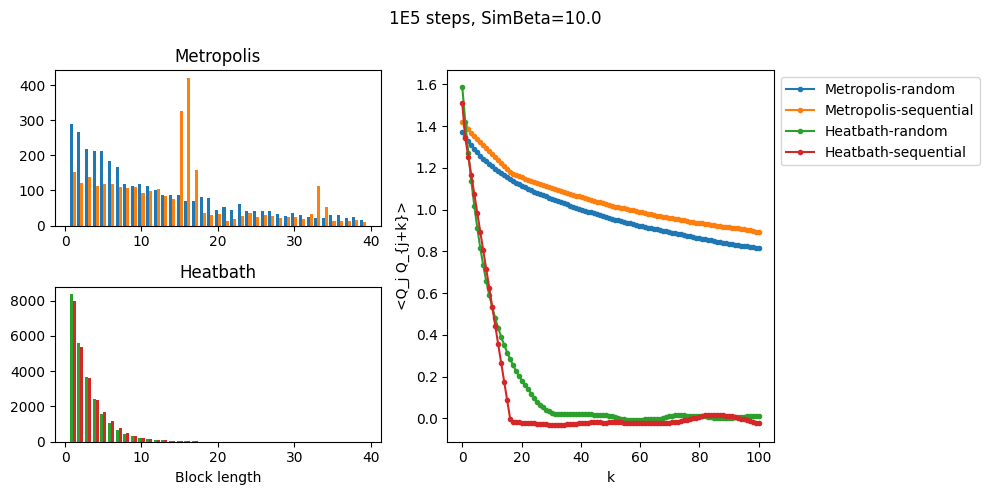

In [141]:
min = 0
max = 100

fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(10, 5), layout="tight")
plt.suptitle(f"{NSteps} steps, SimBeta={FocusSimBeta}")

for s,scheme in enumerate(["Metropolis", "Heatbath"]):
    for r,rs in enumerate(["random", "sequential"]):
        Q = QC[scheme + "-" + rs]
        ax = axd["right"]
        ax.plot(np.linspace(min,max,max-min), Q[min:max],marker='.', label=scheme + "-" + rs, color=Tab10Colors[2*s+r])
        # ax.set_xscale("log")
        # ax.set_yscale("log")
        ax.set_xlabel("k")
        ax.set_ylabel("<Q_j Q_{j+k}>")
        ax.legend(bbox_to_anchor=(1,1), loc="upper left")

bins_array = [x+0.5 for x in range(0,40)]
ax = axd["upper left"]
ax.hist([BL["Metropolis-random"], BL["Metropolis-sequential"]], bins=bins_array, color=[Tab10Colors[0], Tab10Colors[1]])
ax.set_title("Metropolis")
ax.sharex(axd["lower left"])

ax = axd["lower left"]
ax.hist([BL["Heatbath-random"], BL["Heatbath-sequential"]], bins=bins_array, color=[Tab10Colors[2], Tab10Colors[3]])
ax.set_xlabel("Block length")
ax.set_title("Heatbath")

plt.show()

In [1]:
min = 0
max = 1000

plt.plot(np.linspace(min,max,max-min),QSamples[min:max])

NameError: name 'plt' is not defined

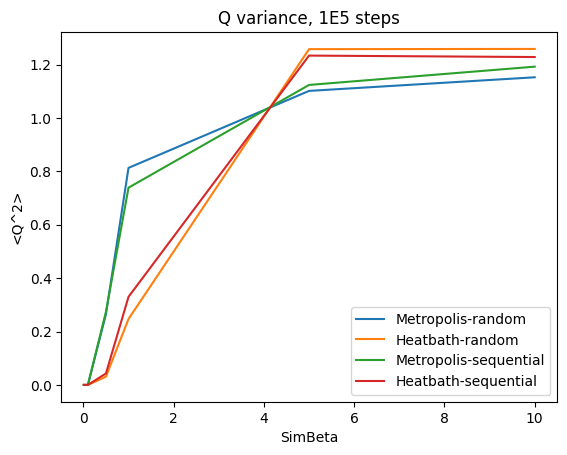

In [134]:
for rs in ["random", "sequential"]:    
    for scheme in ["Metropolis", "Heatbath"]:
        plt.plot(SchemeVariances[scheme + "-" + rs][:,0], SchemeVariances[scheme + "-" + rs][:,1], label=scheme + "-" + rs)
        plt.title("Q variance, " + NSteps + " steps")
        plt.xlabel("SimBeta")
        plt.ylabel("<Q^2>")
        plt.legend()